### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dataSets/synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


### Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [4]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [5]:
# We already know we don't need the IDs so we will just drop those right away
df.drop(columns=['Transaction_ID', 'User_ID'], inplace=True)
df.head()

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [6]:
# Next we want to transform the Timestamp column into useful information
df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month
df['Weekday'] = pd.to_datetime(df['Timestamp']).dt.day_name()
df.drop(columns=['Timestamp'], inplace=True)
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Weekday
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,...,Amex,65,883.17,Biometric,0.8494,0,0,2023,8,Monday
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,...,Mastercard,186,2203.36,Password,0.0959,0,1,2023,6,Wednesday
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,...,Visa,226,1909.29,Biometric,0.8400,0,1,2023,6,Tuesday
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,...,Visa,76,1311.86,OTP,0.7935,0,1,2023,12,Thursday
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,...,Mastercard,140,966.98,Password,0.3819,1,1,2023,11,Saturday


In [7]:
df.isna().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
Year                            0
Month                           0
Weekday                         0
dtype: int64

In [8]:
df[df.duplicated()]

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Weekday


### Visualizing

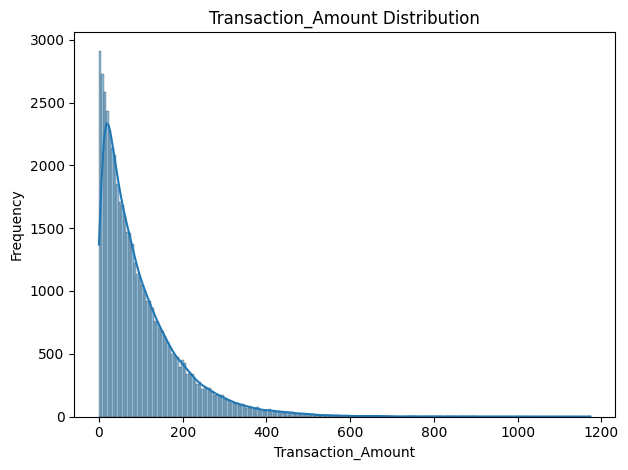

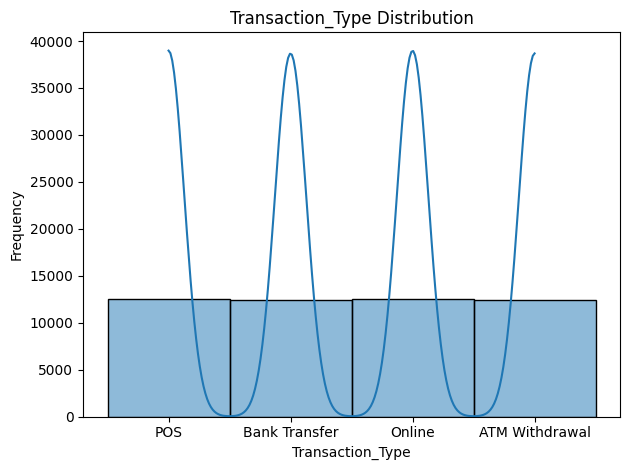

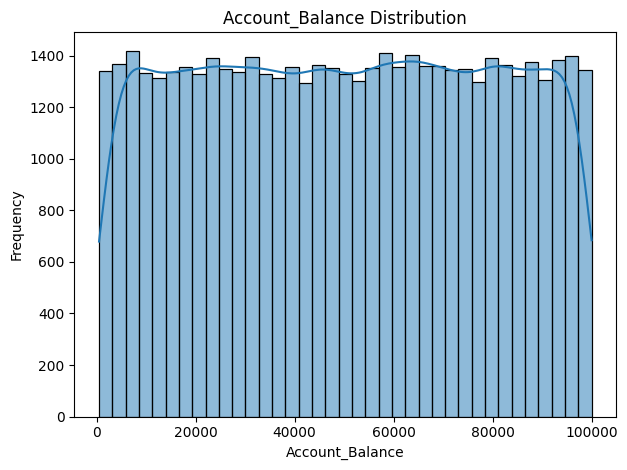

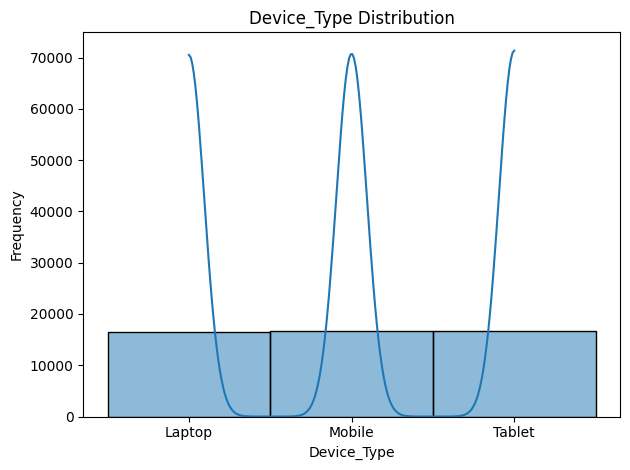

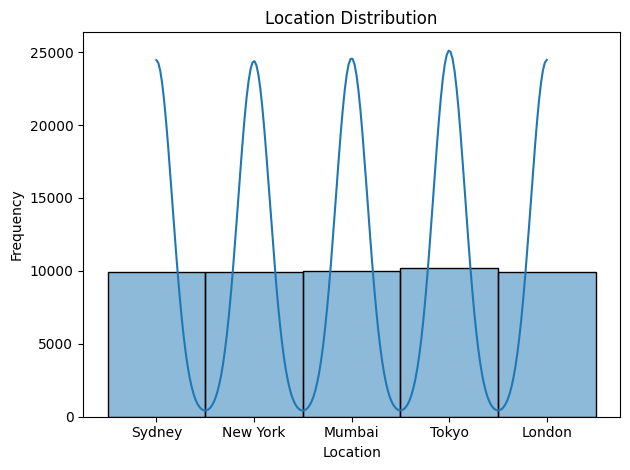

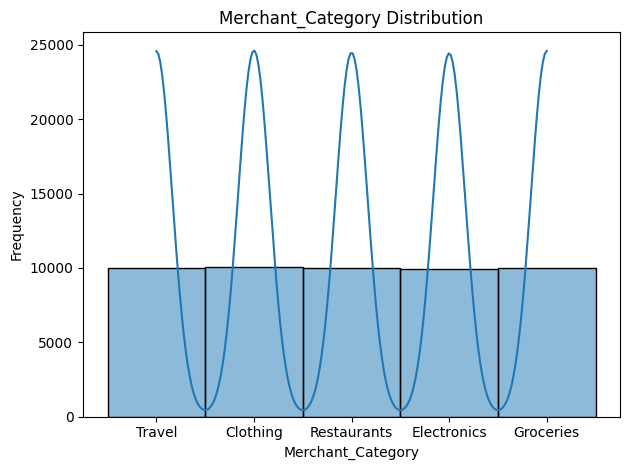

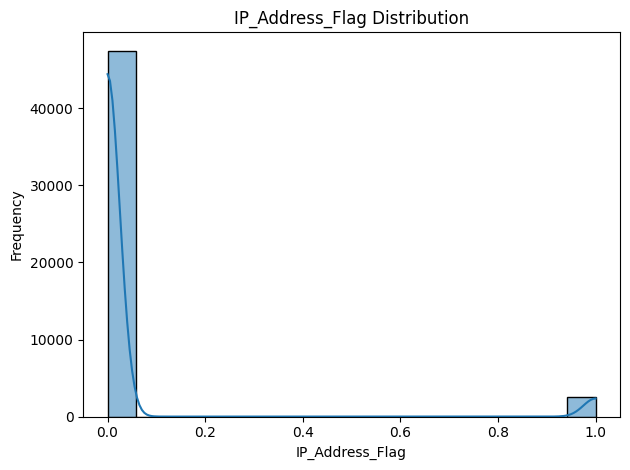

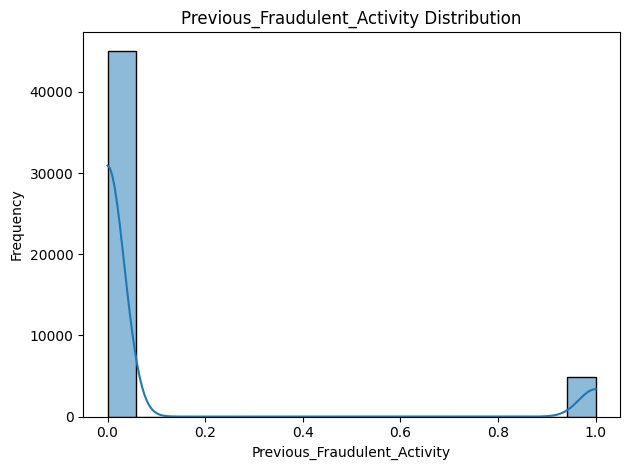

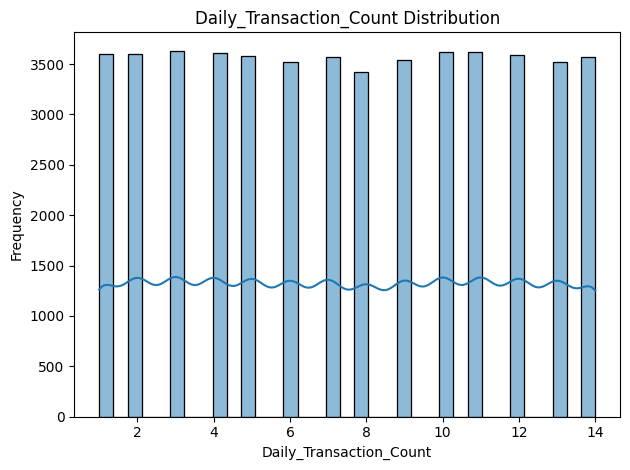

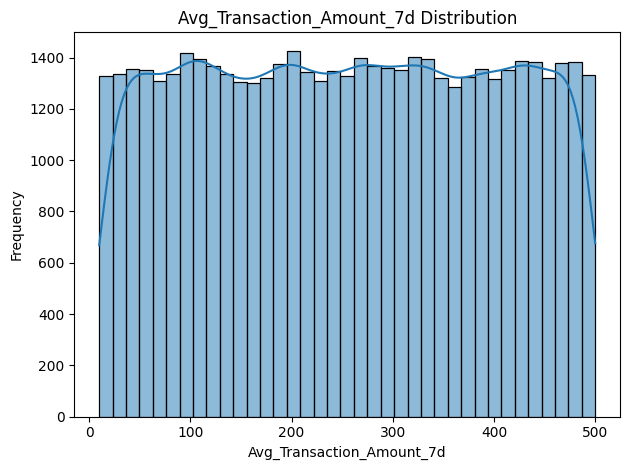

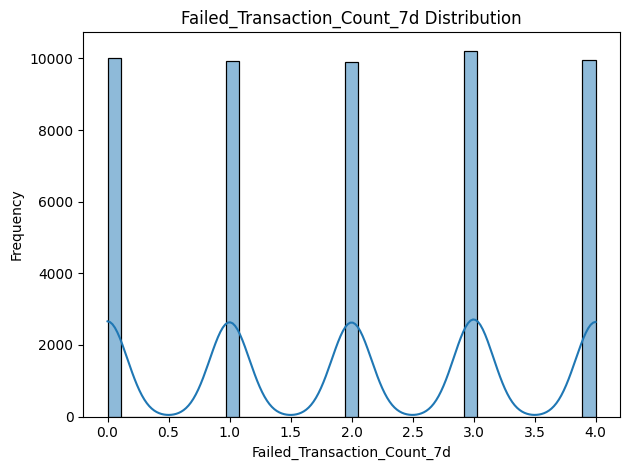

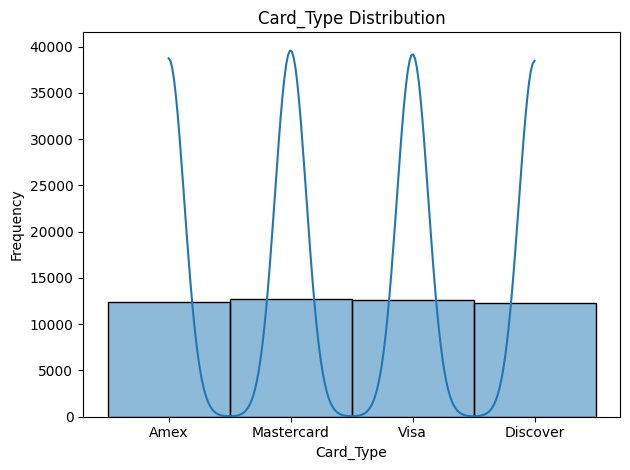

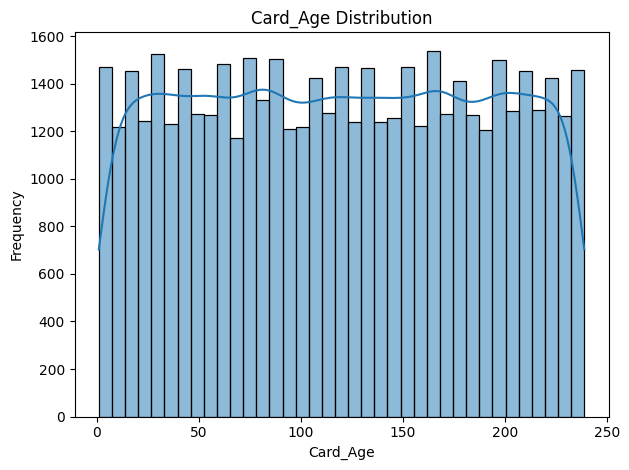

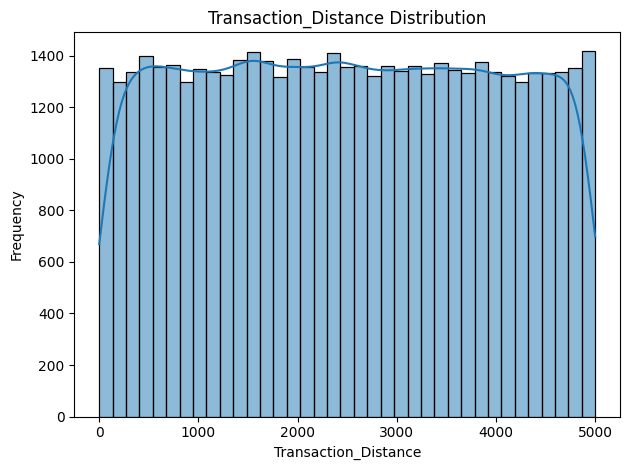

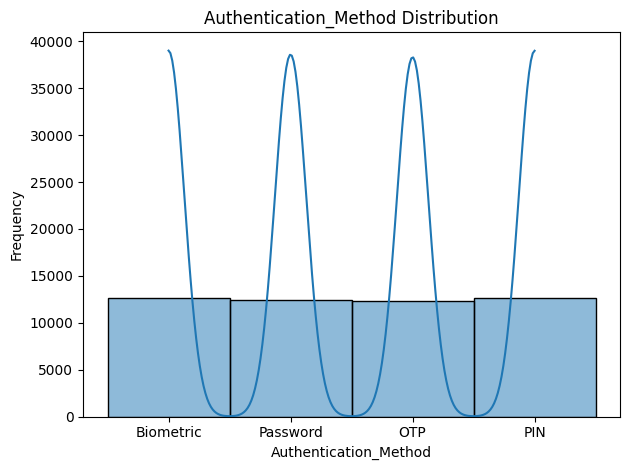

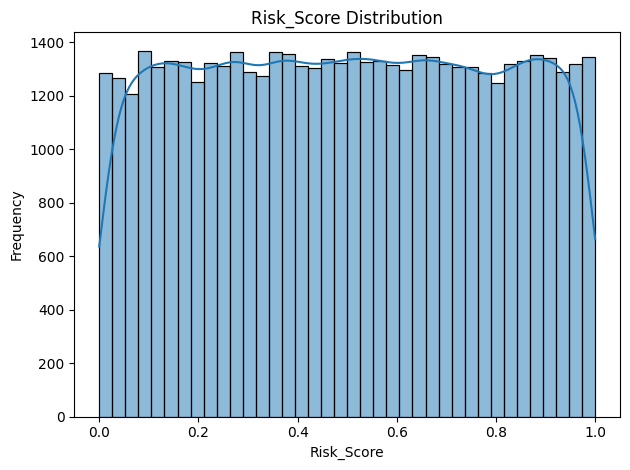

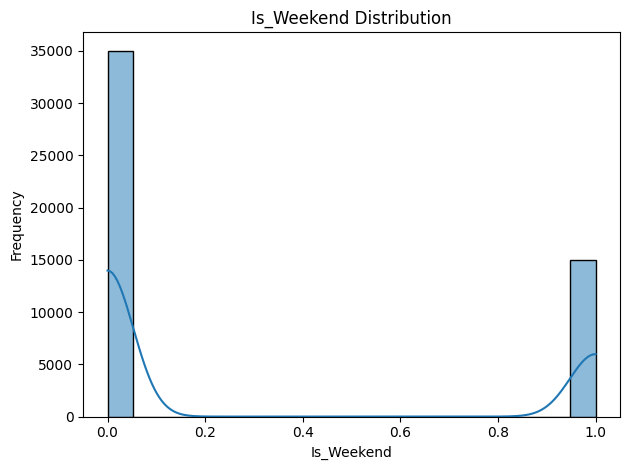

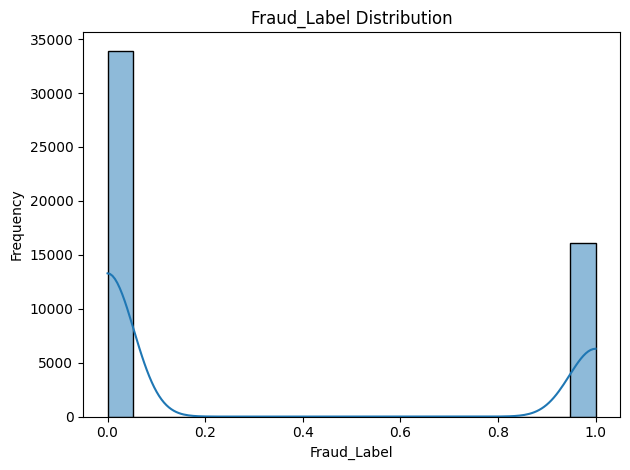

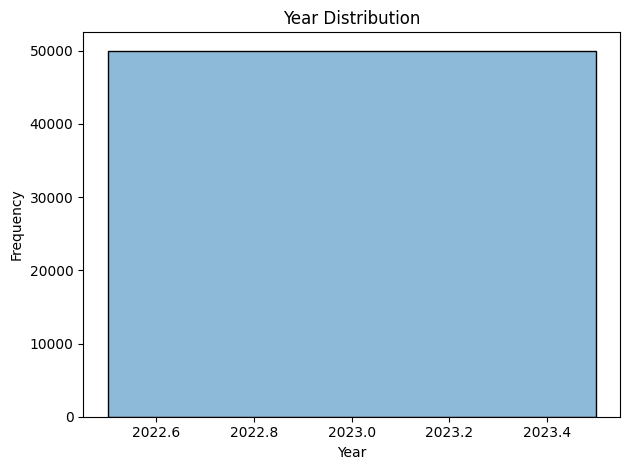

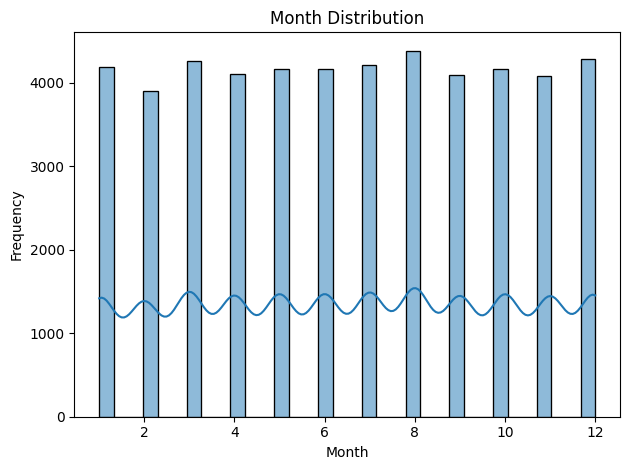

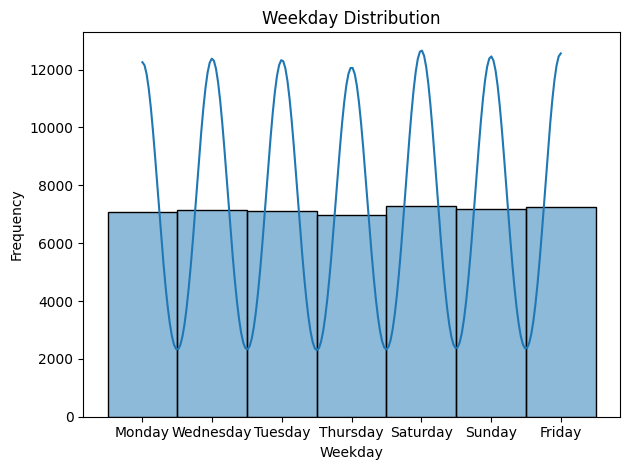

In [9]:
for col in df[:-1]:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

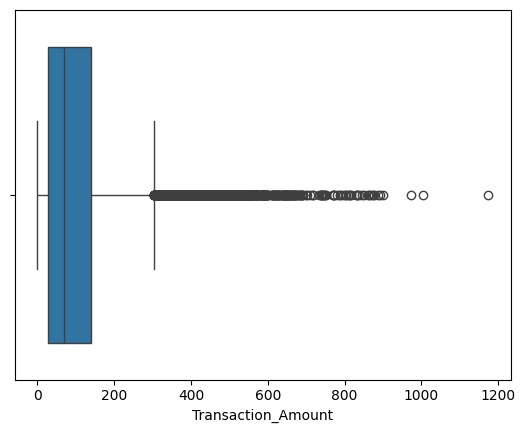

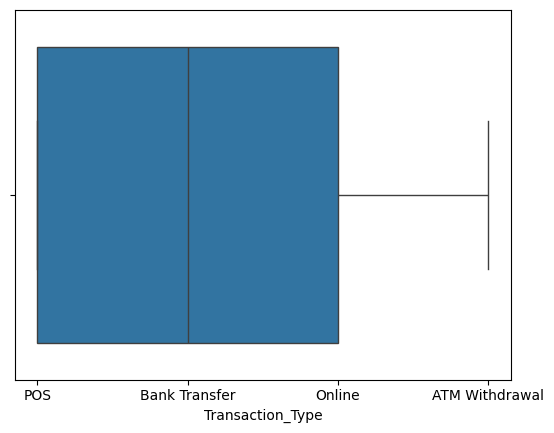

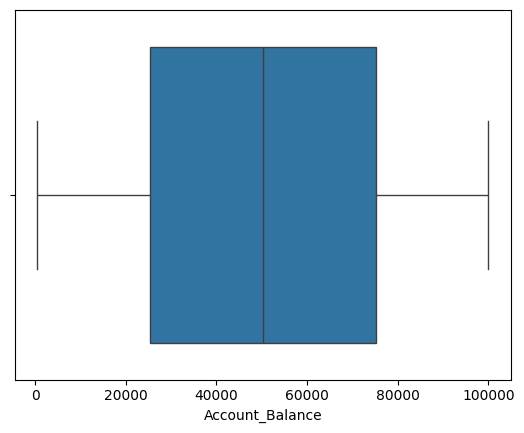

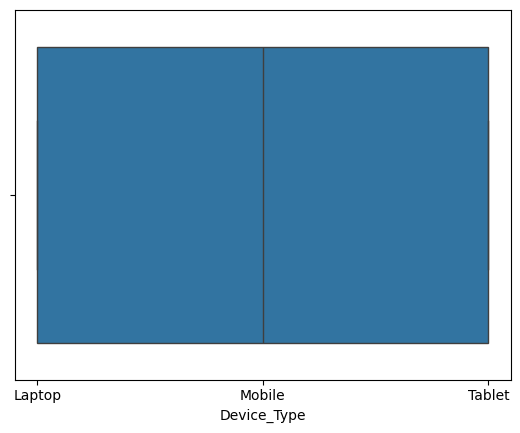

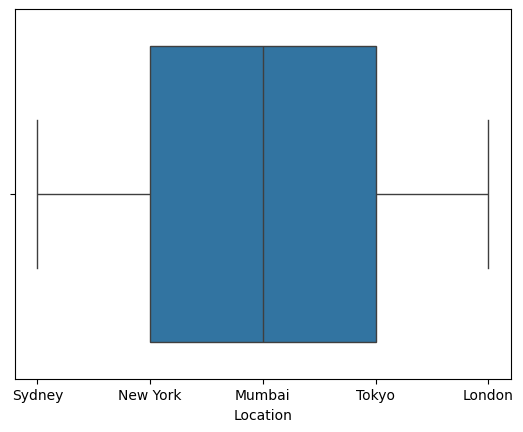

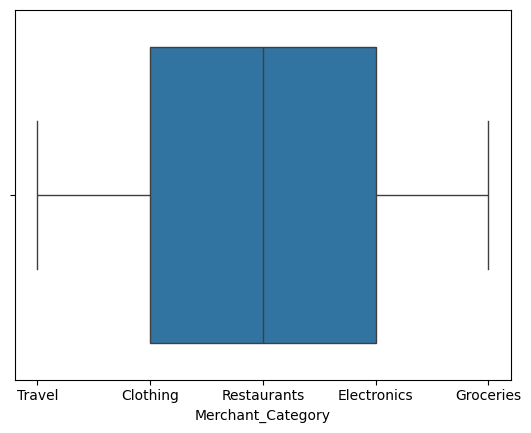

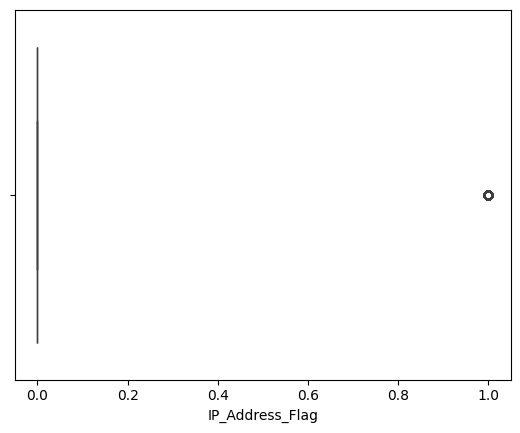

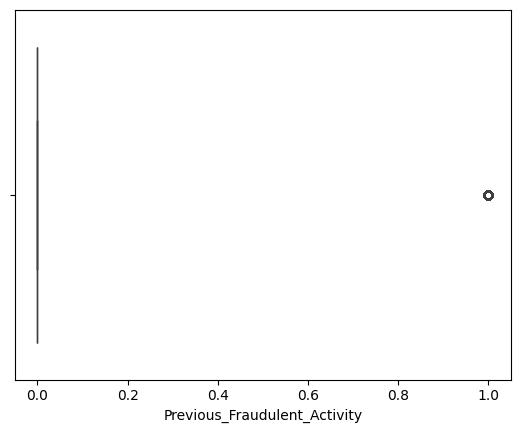

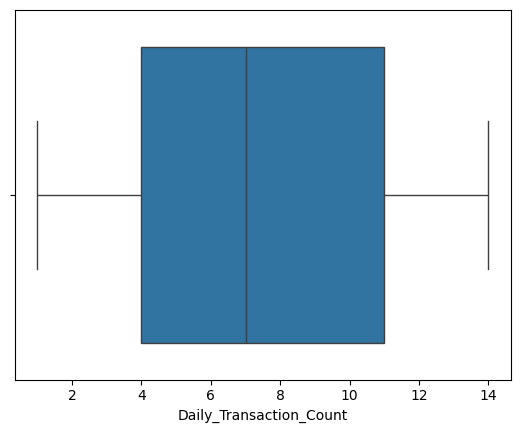

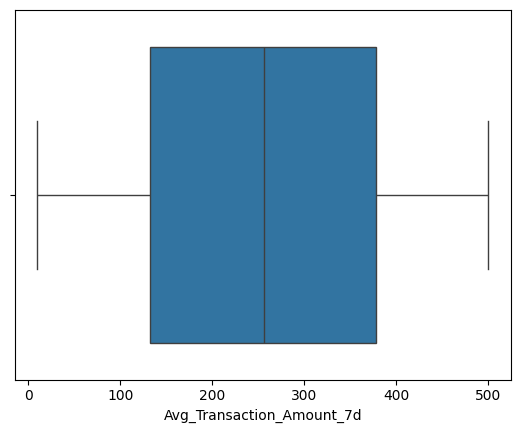

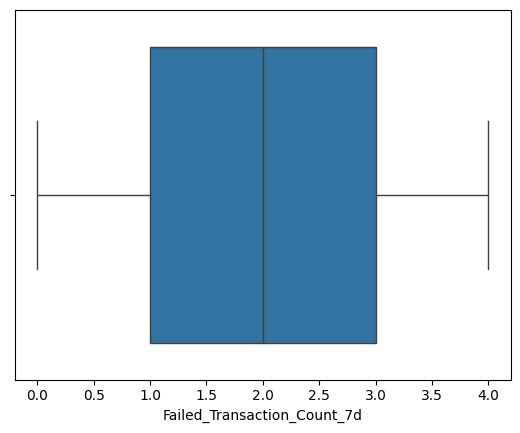

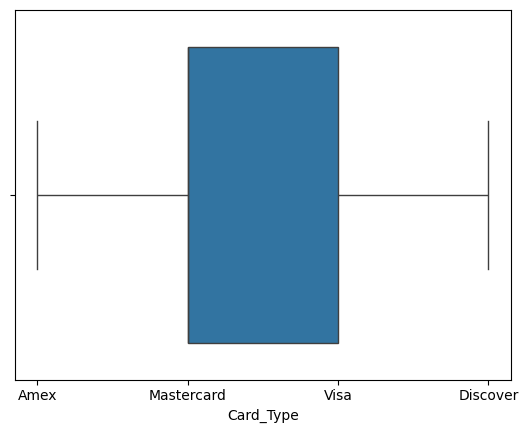

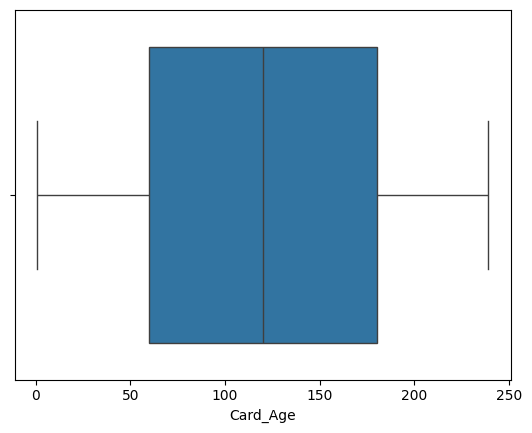

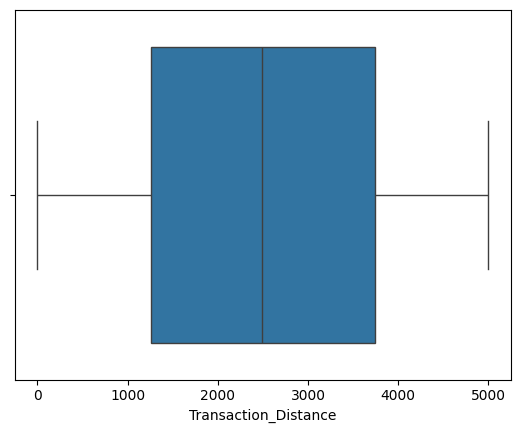

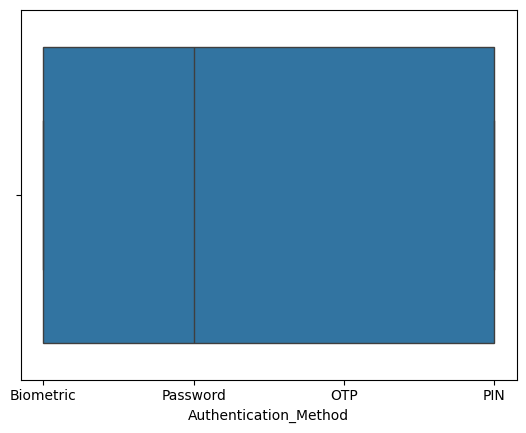

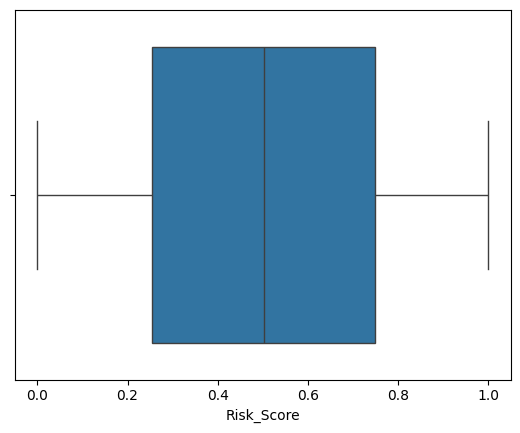

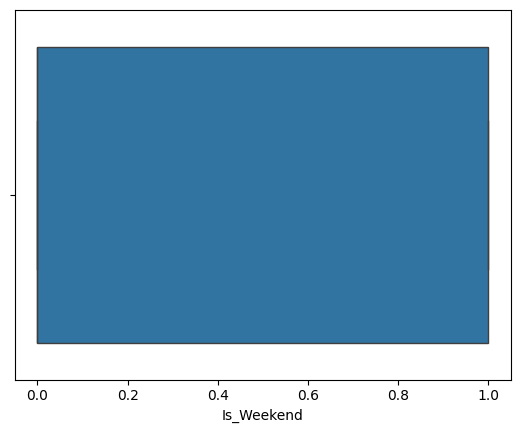

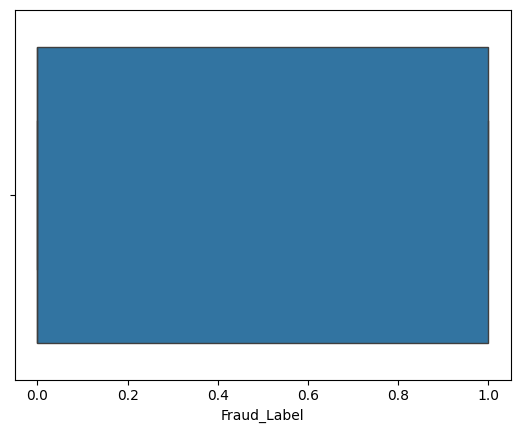

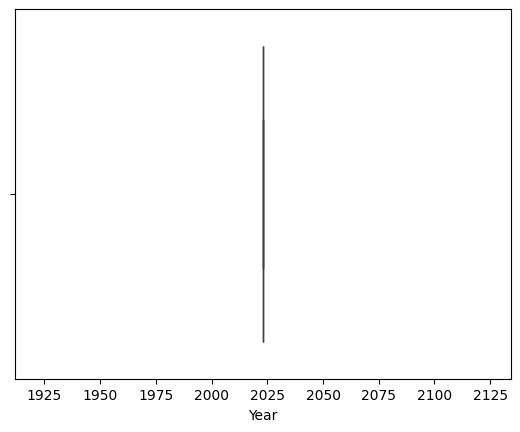

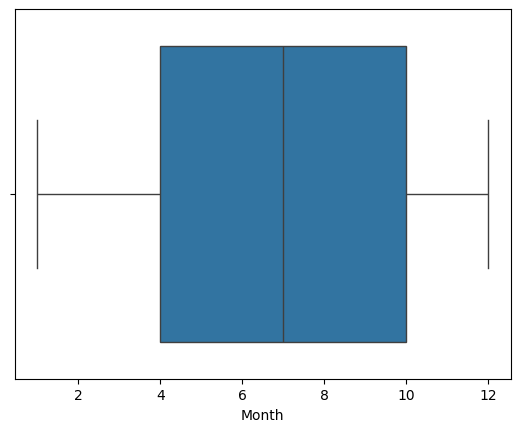

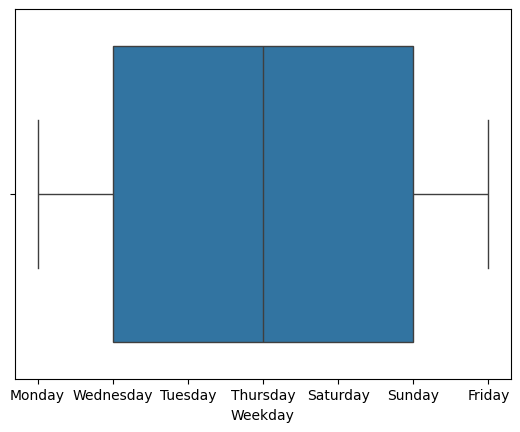

In [10]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()

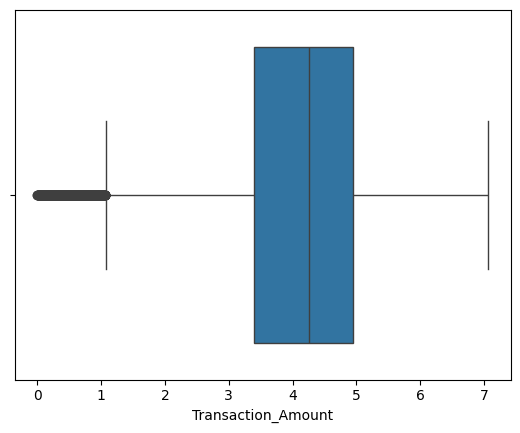

In [11]:
# Transaction amount is severely skewed, let's see the log transformation
loggedTransactionAmount = np.log1p(df['Transaction_Amount'])
sns.boxplot(x=loggedTransactionAmount)
plt.show()

In [12]:
# This looks much better. Let's replace
df['Log_Transaction_Amount'] = loggedTransactionAmount
df.drop(columns=['Transaction_Amount'], inplace=True)
df.head()


,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,...,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Weekday,Log_Transaction_Amount
0,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,...,65,883.17,Biometric,0.8494,0,0,2023,8,Monday,3.708437
1,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,...,186,2203.36,Password,0.0959,0,1,2023,6,Wednesday,0.783902
2,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,...,226,1909.29,Biometric,0.8400,0,1,2023,6,Tuesday,3.399863
3,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,...,76,1311.86,OTP,0.7935,0,1,2023,12,Thursday,5.542518
4,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,...,140,966.98,Password,0.3819,1,1,2023,11,Saturday,3.474448


### Model

interval columns not set, guessing: ['Account_Balance', 'IP_Address_Flag', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Age', 'Transaction_Distance', 'Risk_Score', 'Is_Weekend', 'Fraud_Label', 'Year', 'Month', 'Log_Transaction_Amount']


e:\projects\machine-learning\Notebooks\venv\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Year for analysis 1. Dropping this column
  warnings.warn(


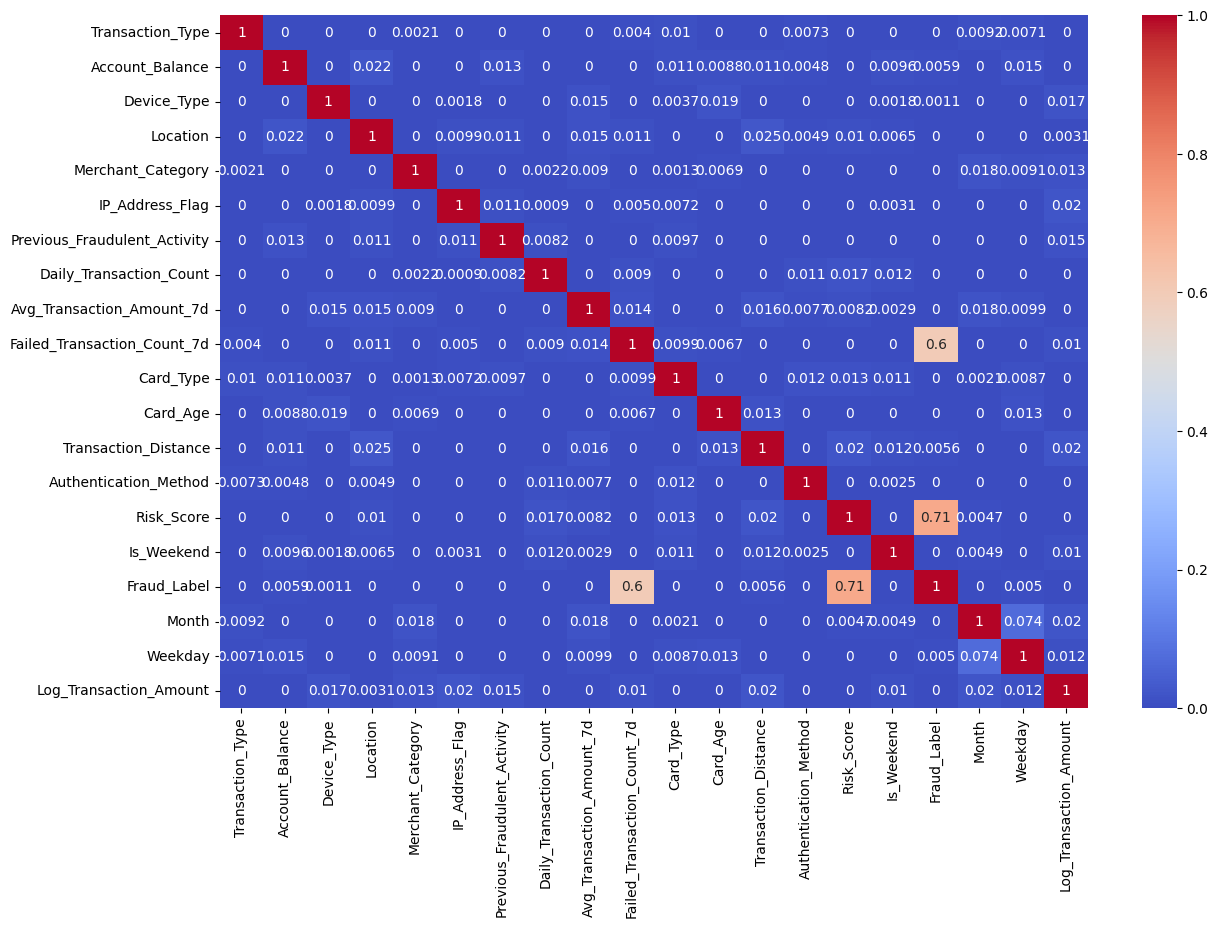

In [16]:
plt.figure(figsize=(14, 9))
corr = df.phik_matrix()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [19]:
# Let's set up X and y and split the data
target = 'Fraud_Label'
X = df.drop(columns=[target])
X_encoded = pd.get_dummies(X, drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [20]:
from xgboost import XGBClassifier

baselineModel = XGBClassifier(use_label_encoder=False, eval_matric='logloss', random_state=42)
baselineModel.fit(X_train, y_train)

e:\projects\machine-learning\Notebooks\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [13:49:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_matric='logloss', eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = baselineModel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9988
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6765
           1       1.00      1.00      1.00      3235

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
 [[6760    5]
 [   7 3228]]


<Figure size 1200x600 with 0 Axes>

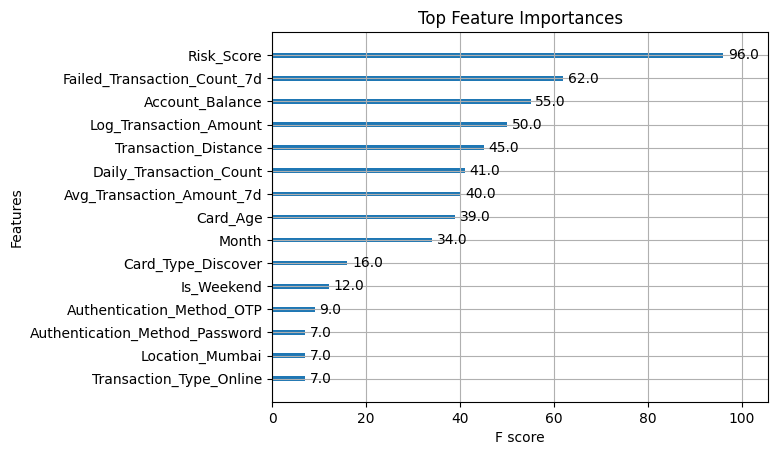

In [24]:
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(baselineModel, max_num_features=15)
plt.title("Top Feature Importances")
plt.show()
